In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def tdlearning(alpha, stimuli, rewards, trials):
    """
    Implements a temporal difference (TD) learning algorithm.

    Parameters:
    - alpha: The learning rate for updating weights.
    - stimuli: A sequence of stimuli presented over time.
    - rewards: A sequence of rewards corresponding to the stimuli.
    - trials: The number of trials for which learning occurs.

    Returns:
    - w (array): The learned weights for each stimulus.
    - v (array): The value estimates for each stimulus over time.
    - delta_v (array): The temporal differences between successive value estimates.
    - delta (array): The TD error for all trials and time steps.
    """
    
    # Initialise value estimates for each stimulus
    v = np.zeros((len(stimuli))) 
    
    # Initialise weights associated with each stimulus
    w = np.zeros(len(stimuli)) 
    
    # Initialise the TD error signal for all trials and time steps
    delta = np.zeros([len(trials), len(stimuli)]) 
    
    # Initialise temporal difference between successive value estimates
    delta_v = np.zeros((len(stimuli))) 
    
    # Iterate over the specified number of trials
    for n in range(len(trials)):
        # Iterate over time steps within the trial
        for t in range(1, len(stimuli)):
            # Compute the value estimate as the dot product of weights and stimuli history
            v[t] = (w[0:t] @ stimuli[t:0:-1])[0]
            
            # Compute the temporal difference between consecutive value estimates
            delta_v[t-1] = v[t] - v[t-1]
            
            # Compute the TD error, combining reward and temporal difference
            delta[n, t] = rewards[t] + delta_v[t]
            
            # Update weights for all preceding time steps in the current trial
            for tau in np.arange(t):
                weight_update = w[tau] + alpha * delta[n, t] * stimuli[t-tau]
                w[tau] = weight_update

    return w, v, delta_v, delta

# Parameters for learning rate (alpha), timesteps (tau) and number of trials (t)

alpha = 0.2
tau = np.arange(250)
t = np.arange(1000)

# Initialise the stimulus array
u = np.zeros((250, 1))
u[100] = 1  # stimulus at time point 100

# Initialise the reward array
r = np.zeros(250)
r[200] = 1

# Set r as Gaussian with its integral normalised to 2
sigma = 5  # standard deviation for the Gaussian distribution
r = gaussian_filter1d(r, sigma)
# Normalise to sum to 2
r *= 2 / np.sum(r)

# *** We might change this so that it would plot normally
v_before = np.zeros(250)
delta_v_before = np.zeros(250)
delta_before = r

In [18]:
# Call the TD learning function
w_after, v_after, delta_v_after, delta_after = tdlearning(alpha, u, r, t)

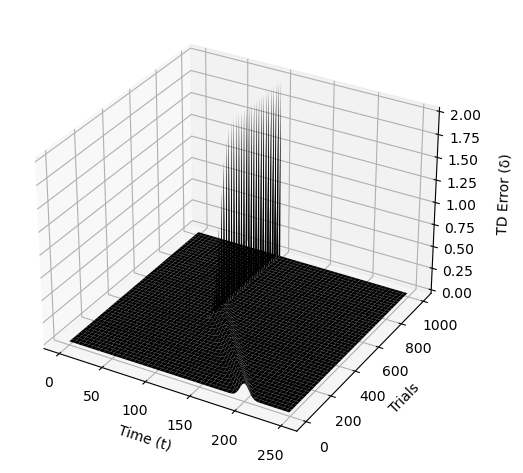

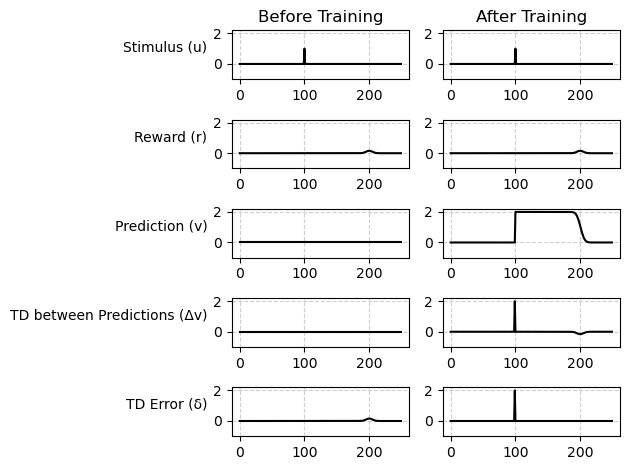

In [20]:
# Create a mesh grid for time points (x-axis) and trials (y-axis)
x, y = np.meshgrid(np.arange(delta_after.shape[1]), np.arange(delta_after.shape[0]))

# Data before and after training
before_training = [u, r, v_before, delta_v_before, delta_before]  # stimulus, rewards, predictions, TD error, and weight changes before training
after_training = [u, r, v_after, delta_v_after, delta_after[-1, :]]  # same metrics after training

def plottdlearning(before_training, after_training, x, y):
    """
    Visualise the results of TD learning. 
    """

    labels = ['Stimulus (u)', 'Reward (r)', 'Prediction (v)', 'TD between Predictions (Δv)', 'TD Error (δ)']

    # Plot 9.2 (A) TD error as a function of time within a trial, across trials
    prediction_error = plt.figure()
    
    ax1 = prediction_error.add_subplot(111, projection='3d')
    ax1.plot_surface(x, y, delta_after, antialiased=True, color='k', alpha=1)
    ax1.set_xlabel('Time (t)')  # Label for the time axis
    ax1.set_ylabel('Trials')  # Label for the trial axis
    ax1.set_zlabel("TD Error (δ)", labelpad=10)  # Label for the z-axis (temporal difference error)

    # Adjust z-label position for readability
    ax1.zaxis.label.set_position((0.05, 0.5))     

    # Show Plot 9.2 (A)
    plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1)
    plt.tight_layout()
    plt.show()

    # Plot 9.2. (B) stimulus, rewards, predictions, TD between predictions, and TD error before and after training
    before_after = plt.figure()  

    for i, (before, after, label) in enumerate(zip(before_training, after_training, labels)):
        # Plot data before training (left column)
        ax2 = before_after.add_subplot(5, 2, 2 * i + 1)  # Left column for data before training
        ax2.plot(tau, before, color='black')  # Plot the data for each metric
        ax2.set_ylabel(label)  # Add a y-axis label with the metric name
        ax2.yaxis.label.set(rotation='horizontal', ha='right')  # Adjust label orientation
        ax2.set_ylim(-1, 2.2)  # Set y-axis limits for consistency
        ax2.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for readability
        if i == 0:
            ax2.set_title('Before Training')  # Title for the left column

        # Plot data after training (right column)
        ax3 = before_after.add_subplot(5, 2, 2 * i + 2)  # Right column for data after training
        ax3.plot(tau, after, color='black')  # Plot the data for each metric
        ax3.set_ylim(-1, 2.2)  # Set y-axis limits for consistency
        ax3.grid(True, linestyle='--', alpha=0.6)  # Add gridlines for readability
        if i == 0:
            ax3.set_title('After Training')  # Title for the right column

    # Adjust layout to prevent overlaps between subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.95, bottom=0.05, hspace=0.5, wspace=0.3)

    # Show Plot 9.2 (B)
    plt.tight_layout()
    plt.show()
    
# Call the function to generate the plots
plottdlearning(before_training, after_training, x, y)